In [1]:
# jpype1<1.1 설치
# !pip install -U "jpype1<1.1"

  Attempting uninstall: jpype1
    Found existing installation: JPype1 1.3.0
    Uninstalling JPype1-1.3.0:
      Successfully uninstalled JPype1-1.3.0


In [2]:
# konlpy와 wordcloud 설치
# 한글을 사용하기 위해 세종사전 이용
!pip install konlpy
!pip install wordcloud

In [4]:
# numpy 라이브러리, pandas 라이브러리, matplotlib 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp

In [54]:
# 한글화
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [6]:
# 데이터 전처리를 위한 라이브러리 임포트
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

### 데이터 가져오기

In [11]:
# 빅카인즈에서 수집한 데이터 불러오기
df = pd.read_excel('game_news_crawling_20210101-20210930.xlsx')
df.head()

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.100101e+06,20210930,경향신문,차준철 논설위원 cheol@kyunghyang.com,[여적] 달고나 따라하기,문화>방송_연예,IT_과학>콘텐츠,문화>출판,NaN,NaN,NaN,NaN,미국,"모나리자,넷플릭스,인도네시아,한창,한국,이베이","달고,추억,군것질,거리,놀이,코로나,시대,집콕,아이콘,커피,설탕,400번,우유,달고...","달고,달고나,400번,연탄불,길거리,온라인,집콕,넷플릭스,인도네시아,조회수,누리꾼,...",1970~80년대 추억의 군것질거리 달고나는 지난해 봄 코로나 시대 ‘집콕 놀이’의...,https://www.khan.co.kr/opinion/yeojeok/article...,NaN
1,7.101201e+06,20210930,디지털타임스,윤선영,"엔씨소프트 ""리니지W 사업모델 체질 개선할것""",IT_과학>콘텐츠,IT_과학>모바일,IT_과학>보안,NaN,NaN,NaN,"이,이성구,김택신",NaN,"쇼케이스,BM,엔씨소프트","개선,엔씨소프트,리니지,사업,모델,체질,단언,MMORPG,신작,멀티플랫폼,다중접속역...","리니지,그룹장,엔씨소프트,아인하사드,쇼케이스,마법인형,리니지w,bm,마법인,이성구,...","""단언컨대 신작 멀티플랫폼 MMORPG(다중접속역할수행게임) '리니지W'에서는 서비...",http://www.dt.co.kr/contents.html?article_no=2...,NaN
2,7.101201e+06,20210930,디지털타임스,김나인,"오징어게임, 미국 유럽 80개국 1위 `글로벌 열풍`",IT_과학>콘텐츠,NaN,NaN,NaN,NaN,NaN,테드 사란도스,"우크라이나,최고경영자,미국,인도,영국,유럽,할리우드,한국,남아프리카공화국","CNN,유럽,가디언,넷플릭스,한국","오징어게임,미국,유럽,개국,글로벌,열풍,기생충,역사,월드,랭킹,포인트,압도,선두,C...","넷플릭스,미국,기생충,1위,오스카,한국,3개국,80개국,데드라인,cnn,플릭스,영국...",국내 드라마 시리즈 '오징어 게임'이 글로벌 시장에서 선풍적인 인기를 끌고 있는 가...,http://www.dt.co.kr/contents.html?article_no=2...,NaN
3,8.100101e+06,20210930,KBS,천현수,자치단체 개발 공공앱 30% 폐기 “예산 낭비”,IT_과학>콘텐츠,IT_과학>보안,NaN,NaN,NaN,NaN,한병도/국회,"김해시,합천군,함안군,천현수,경남,경남지역,창원시","양산시,행정안전부,행정안전위원회,창원시,함양군","자치단체,예산,낭비,앵커,지방자치단체들,스마트폰용,3개,1개,폐기,처지,시민들,사후...","창원시,사용자,1개,양산시,자치단체,경남,행정안전부,농산물,3개,10억,관광지,천현...",[KBS 창원]\n [앵커]\n\n 지방자치단체들이 수천억 원에서 수천만 원을 들여...,https://news.kbs.co.kr/news/view.do?ncd=529094...,NaN
4,1.100901e+06,20210930,중앙일보,이해준(lee.hayjune@joongang.co.kr),"""한때 전교1등"" 오징어게임 그 남자 대기업 다니다 연기 도전",문화>방송_연예,문화>영화,IT_과학>콘텐츠,NaN,NaN,NaN,"이동휘,정호연,허성태,최","개성,베네타","전교,SBS,보테가,넷플릭스,루이뷔통","전교1등,오징어게임,남자,대기업,연기,도전,넷플릭스,오리지널,드라마,오징어,게임,인...","정호연,허성태,오징어게임,명대,인스타,대기업,장덕수,연기자,참가자,외국인,지영,넷플...","넷플릭스 오리지널 드라마 ‘오징어게임’의 인기가 높아지면서 허성태, 정호연 등 조연...",https://www.joongang.co.kr/article/25011341,NaN


In [12]:
# 데이터 프레임의 행과 열 개수 확인
# 19개의 컬럼과 20000개의 행
df.shape

(20000, 19)

In [13]:
# 데이터 프레임의 전반적인 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   뉴스 식별자             20000 non-null  float64
 1   일자                 20000 non-null  int64  
 2   언론사                20000 non-null  object 
 3   기고자                19323 non-null  object 
 4   제목                 20000 non-null  object 
 5   통합 분류1             20000 non-null  object 
 6   통합 분류2             15756 non-null  object 
 7   통합 분류3             9588 non-null   object 
 8   사건/사고 분류1          2293 non-null   object 
 9   사건/사고 분류2          544 non-null    object 
 10  사건/사고 분류3          110 non-null    object 
 11  인물                 12797 non-null  object 
 12  위치                 16283 non-null  object 
 13  기관                 19854 non-null  object 
 14  키워드                20000 non-null  object 
 15  특성추출(가중치순 상위 50개)  20000 non-null  object 
 16  본문                 200

## 제목으로 워드클라우드 생성

### 명사 단어 추출하기

In [14]:
# 세종사전 실행
twitter = Okt()

In [25]:
# 단어 리스트 만들기
# 제목 컬럼만 추출해서 저장
word_list = df['제목']

In [26]:
# 리스트 상위 5개 조회
word_list.head()

0                          [여적] 달고나 따라하기
1              엔씨소프트 "리니지W 사업모델 체질 개선할것"
2          오징어게임, 미국 유럽 80개국 1위 `글로벌 열풍`
3             자치단체 개발 공공앱 30% 폐기 “예산 낭비”
4    "한때 전교1등" 오징어게임 그 남자  대기업 다니다 연기 도전
Name: 제목, dtype: object

### 형태소 분리

In [27]:
sentences_tag = []

for sentence in word_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)

print(morph)

[('유아인', 'Noun'), ('이', 'Josa'), ('광고', 'Noun'), ('하는', 'Verb'), ('그', 'Noun'), ('게임', 'Noun'), ("'", 'Punctuation'), ('그', 'Noun'), ('랑', 'Josa'), ('사가', 'Noun'), ("',", 'Punctuation'), ('26일', 'Number'), ('출시', 'Noun')]


### 명사 추출

In [28]:
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [29]:
# 두 단어 이상만 추출
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['여적',
 '달고나',
 '엔씨소프트',
 '리니지',
 '사업',
 '모델',
 '체질',
 '개선',
 '오징어',
 '게임',
 '미국',
 '유럽',
 '개국',
 '글로벌',
 '열풍',
 '자치',
 '단체',
 '개발',
 '폐기',
 '예산',
 '낭비',
 '전교',
 '오징어',
 '게임',
 '남자',
 '대기업',
 '연기',
 '도전',
 '단독',
 '구글',
 '국법',
 '준수',
 '외부',
 '결제',
 '불이익',
 '소원',
 '위메이드',
 '미르',
 '글로벌',
 '서버',
 '돌파',
 '코로나',
 '모멘텀',
 '제약',
 '바이오',
 '증발',
 '청라',
 '언덕',
 '오징어',
 '게임',
 '이타',
 '인간',
 '퓨쳐',
 '컴퍼니',
 '메타',
 '버스',
 '토지',
 '개발',
 '건설',
 '우파',
 '노제',
 '서든어택',
 '캐릭터',
 '등장',
 '인기',
 '고공',
 '행진',
 '엔씨',
 '리니지',
 '넷플릭스',
 '중국',
 '이베이',
 '오징어',
 '게임',
 '블루레이',
 '판매',
 '본격',
 '대세',
 '행보',
 '우파',
 '노제',
 '게임',
 '캐릭터',
 '롤러코스터',
 '게임',
 '반등',
 '아인',
 '사드',
 '폐지',
 '수익모델',
 '대수술',
 '반전',
 '뉴스',
 '오늘',
 '오징어',
 '게임',
 '정치권',
 '오징어',
 '게임',
 '숟가락']

### 단어 카운트

In [68]:
counts = Counter(noun_list)
tags = counts.most_common(200)
tags

[('게임', 5347),
 ('출시', 1083),
 ('버스', 1032),
 ('메타', 999),
 ('콘텐츠', 834),
 ('카카오', 730),
 ('글로벌', 694),
 ('오징어', 686),
 ('투자', 623),
 ('기업', 596),
 ('삼성', 569),
 ('공개', 520),
 ('신작', 518),
 ('모바일', 495),
 ('플랫폼', 488),
 ('개발', 486),
 ('구글', 476),
 ('시장', 467),
 ('한국', 462),
 ('디지털', 445),
 ('넷마블', 436),
 ('코로나', 420),
 ('넥슨', 415),
 ('매출', 415),
 ('크래프톤', 410),
 ('전자', 403),
 ('세계', 398),
 ('업계', 388),
 ('사업', 384),
 ('엔씨소프트', 378),
 ('온라인', 373),
 ('교육', 365),
 ('산업', 360),
 ('서비스', 346),
 ('기술', 334),
 ('애플', 327),
 ('최대', 325),
 ('국내', 321),
 ('지원', 319),
 ('넷플릭스', 308),
 ('시대', 306),
 ('영업', 299),
 ('엔씨', 295),
 ('중국', 294),
 ('개최', 285),
 ('리니지', 280),
 ('미래', 277),
 ('체인', 266),
 ('결제', 259),
 ('네이버', 259),
 ('문화', 249),
 ('대표', 248),
 ('컴투스', 247),
 ('돌파', 240),
 ('마켓', 240),
 ('주가', 236),
 ('세대', 232),
 ('최고', 229),
 ('가상', 228),
 ('게이', 227),
 ('어비스', 226),
 ('실적', 223),
 ('해외', 219),
 ('아이템', 216),
 ('블록', 216),
 ('확률', 215),
 ('성장', 214),
 ('시작', 214),
 ('모집', 214),
 ('인수', 

### 워드클라우드 생성

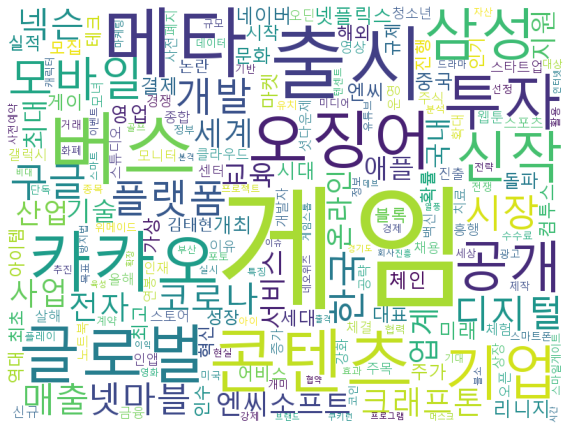

In [69]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## 본문으로 워드클라우드 생성

### 명사 단어 추출하기

In [71]:
# 단어 리스트 만들기
# 제목 컬럼만 추출해서 저장
word_list2 = df['본문']

In [72]:
# 리스트 상위 5개 조회
word_list2.head()

0    1970~80년대 추억의 군것질거리 달고나는 지난해 봄 코로나 시대 ‘집콕 놀이’의...
1    "단언컨대 신작 멀티플랫폼 MMORPG(다중접속역할수행게임) '리니지W'에서는 서비...
2    국내 드라마 시리즈 '오징어 게임'이 글로벌 시장에서 선풍적인 인기를 끌고 있는 가...
3    [KBS 창원]\n [앵커]\n\n 지방자치단체들이 수천억 원에서 수천만 원을 들여...
4    넷플릭스 오리지널 드라마 ‘오징어게임’의 인기가 높아지면서 허성태, 정호연 등 조연...
Name: 본문, dtype: object

### 형태소 분리

In [73]:
sentences_tag = []

for sentence in word_list2:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)

print(morph)

[('엔', 'Josa'), ('픽셀', 'Noun'), ('은', 'Josa'), ('모바일', 'Noun'), ('다중접속', 'Noun'), ('역할', 'Noun'), ('수행', 'Noun'), ('게임', 'Noun'), ('(', 'Punctuation'), ('MMORPG', 'Alpha'), (')', 'Punctuation'), ('‘', 'Foreign'), ('그', 'Noun'), ('랑', 'Josa'), ('사가', 'Noun'), ('’', 'Punctuation'), ('를', 'Noun'), ('오는', 'Verb'), ('26일', 'Number'), ('출시', 'Noun'), ('한다고', 'Verb'), ('7일', 'Number'), ('밝혔다', 'Verb'), ('.', 'Punctuation'), ('엔', 'Josa'), ('픽셀', 'Noun'), ('은', 'Josa'), ('넷마블', 'Noun'), ('‘', 'Foreign'), ('세븐', 'Noun'), ('나이', 'Noun'), ('츠', 'Noun'), ('’', 'Punctuation'), ('제', 'Modifier'), ('작', 'Modifier'), ('진', 'Noun'), ('이', 'Josa'), ('만든', 'Verb'), ('게임', 'Noun'), ('개발', 'Noun'), ('사다', 'Verb'), ('.', 'Punctuation'), ('창립', 'Noun'), ('후', 'Noun'), ('총', 'Noun'), ('600억', 'Number'), ('원', 'Noun'), ('을', 'Josa'), ('투자', 'Noun'), ('받으며', 'Verb'), ('게임', 'Noun'), ('업계', 'Noun'), ('에서', 'Josa'), ('화제', 'Noun'), ('를', 'Josa'), ('모았다', 'Verb'), ('.', 'Punctuation'), ('그', 'Noun'), ('랑', 'Josa')

### 명사 추출

In [74]:
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [75]:
# 두 단어 이상만 추출
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['추억',
 '군것질',
 '거리',
 '달고나',
 '지난해',
 '코로나',
 '시대',
 '집콕',
 '놀이',
 '아이콘',
 '커피',
 '설탕',
 '이상',
 '우유',
 '부어',
 '달고나',
 '커피',
 '유행',
 '팔이',
 '휘저으',
 '스트레스',
 '추억',
 '힐링',
 '커피',
 '진짜',
 '달고나',
 '달고나',
 '설탕',
 '인스턴트',
 '커피',
 '단언컨대',
 '신작',
 '멀티플랫폼',
 '다중접속',
 '역할',
 '수행',
 '게임',
 '리니지',
 '서비스',
 '종료',
 '시점',
 '아인',
 '사드',
 '축복',
 '시스템',
 '콘텐츠',
 '약속',
 '이성구',
 '엔씨소프트',
 '리니지',
 '그룹',
 '과도',
 '과금',
 '체계',
 '소통',
 '부재',
 '위기',
 '봉착',
 '엔씨소프트',
 '사업',
 '모델',
 '고치',
 '체질',
 '개선',
 '국내',
 '드라마',
 '시리즈',
 '오징어',
 '게임',
 '글로벌',
 '시장',
 '선풍',
 '인기',
 '가운데',
 '넷플릭스',
 '서비스',
 '제공',
 '국가',
 '개국',
 '제외',
 '모든',
 '나라',
 '기염',
 '기생충',
 '승리',
 '영화',
 '드라마',
 '역사',
 '기록',
 '평가',
 '유럽',
 '미국',
 '주요',
 '외신',
 '오징어',
 '게임',
 '선풍',
 '창원',
 '앵커',
 '지방자치단체']

### 단어 카운트

In [76]:
counts = Counter(noun_list)
tags = counts.most_common(200)
tags

[('게임', 20722),
 ('기자', 4283),
 ('콘텐츠', 3874),
 ('기업', 3639),
 ('서비스', 3299),
 ('출시', 3194),
 ('개발', 3127),
 ('국내', 3123),
 ('한국', 3113),
 ('모바일', 3059),
 ('대표', 3005),
 ('시장', 2986),
 ('지난', 2925),
 ('온라인', 2808),
 ('글로벌', 2782),
 ('통해', 2517),
 ('투자', 2392),
 ('코로나', 2373),
 ('플랫폼', 2330),
 ('메타', 2322),
 ('세계', 2321),
 ('사업', 2287),
 ('버스', 2270),
 ('매출', 2266),
 ('공개', 2257),
 ('기술', 2229),
 ('카카오', 2193),
 ('진행', 2142),
 ('업계', 2027),
 ('최근', 1988),
 ('산업', 1980),
 ('중국', 1972),
 ('지난해', 1957),
 ('미국', 1925),
 ('경제', 1786),
 ('전자', 1777),
 ('올해', 1772),
 ('이번', 1735),
 ('머니투데이', 1699),
 ('엔씨소프트', 1695),
 ('사진', 1650),
 ('위해', 1641),
 ('넷플릭스', 1606),
 ('제공', 1603),
 ('시간', 1593),
 ('디지털', 1507),
 ('아시아', 1502),
 ('오징어', 1499),
 ('문화', 1447),
 ('구글', 1438),
 ('신작', 1393),
 ('기록', 1393),
 ('시작', 1372),
 ('대비', 1362),
 ('관련', 1347),
 ('최대', 1347),
 ('업체', 1331),
 ('대한', 1303),
 ('지원', 1278),
 ('인기', 1268),
 ('애플', 1250),
 ('교육', 1228),
 ('넷마블', 1226),
 ('넥슨', 1219),
 ('영업', 1211),
 ('

### 워드클라우드 생성

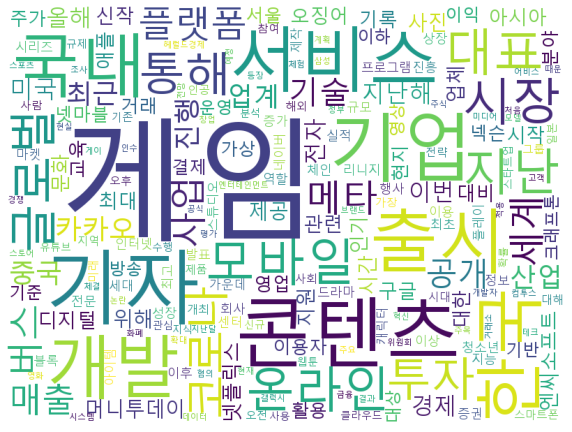

In [77]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()